<a href="https://colab.research.google.com/github/harishraj2108/prediction--project/blob/main/climate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd

***LOADING THE DATA***

In [116]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


In [117]:
df.tail(10)

,date,meantemp,humidity,wind_speed,meanpressure
1452,2016-12-23,15.550000,74.700000,1.205000,1014.250000
1453,2016-12-24,17.318182,78.636364,5.236364,1011.318182
1454,2016-12-25,14.000000,94.300000,9.085000,1014.350000
1455,2016-12-26,17.142857,74.857143,8.784211,1016.952381
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


**HERE WE GET THE STATISTICAL VALUE OF THE DATA FOR MODEL SELECTION**

In [118]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


**CHECK FOR NULL VALUES IN THE DATA, IF NULL VALUES ARE PRESENT WE HANDLE THEM BY REPLACING SUFFICIENT VALUES
**

In [120]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


**AFTER ANALYSES THERE IS NO NULL VALUES PRESENT IN THE DATA SET**

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
scale = StandardScaler()
list1 = ['meantemp','humidity']
df[list1] = scale.fit_transform(df[list1])
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,-2.109500,1.415439,0.000000,1015.666667
1,2013-01-02,-2.463454,1.862828,2.980000,1017.800000
2,2013-01-03,-2.495219,1.564569,4.633333,1018.666667
3,2013-01-04,-2.291015,0.630022,1.233333,1017.166667
4,2013-01-05,-2.654044,1.554627,3.700000,1016.500000
5,2013-01-06,-2.517908,1.314031,1.480000,1018.000000
6,2013-01-07,-2.517908,1.063492,6.300000,1020.000000
7,2013-01-08,-2.265084,0.175531,7.142857,1018.714286
8,2013-01-09,-1.564956,-0.567988,12.500000,1017.000000
9,2013-01-10,-1.973364,0.073270,7.400000,1015.666667


**WE SCALE THE VALUES TO INCREASE ACCURACY OF THE MODEL**

In [123]:
df.dtypes

,0
date,object
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


FOR TRAINING AND TO INCREASE ACCURACY OF THE MODEL, WE REMOVE THE OBJECT DATATYPES. THE DATA TYPES CAN BE OF INT , FLOAT OR DATETIME FOR BETTER ANALYSIS

In [124]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

,0
date,datetime64[ns]
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


In [125]:
core  = df.corr()

**WE PLOT THE CORRELATION BETWEEN THE VALUES IN HEATMAP**

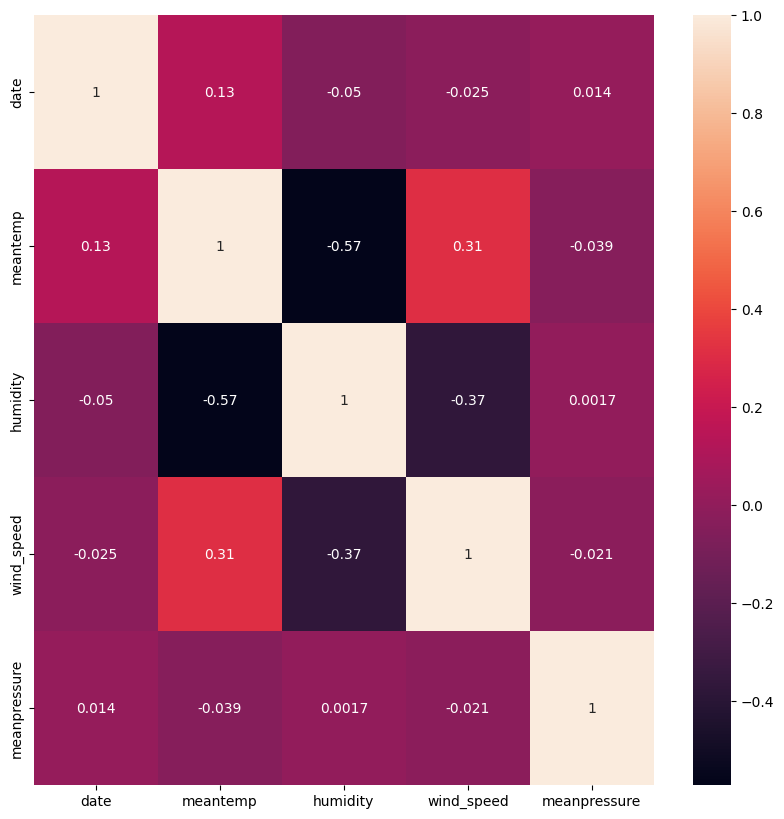

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,10))
sns.heatmap(core,annot=True)
plt.show()

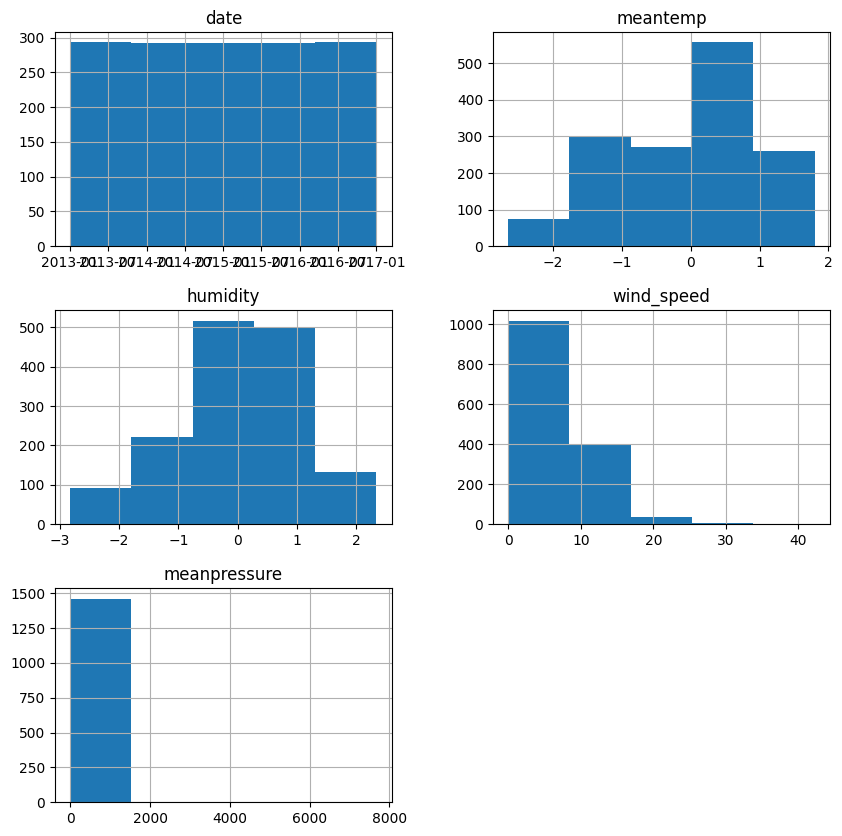

In [127]:
df.hist(figsize=(10,10),bins =5)
plt.show()

In [128]:
x = df.drop('meantemp',axis = 1)
y = df['meantemp']

In [129]:
x

,date,humidity,wind_speed,meanpressure
0,2013-01-01,1.415439,0.000000,1015.666667
1,2013-01-02,1.862828,2.980000,1017.800000
2,2013-01-03,1.564569,4.633333,1018.666667
3,2013-01-04,0.630022,1.233333,1017.166667
4,2013-01-05,1.554627,3.700000,1016.500000
...,...,...,...,...
1457,2016-12-28,0.433776,3.547826,1015.565217
1458,2016-12-29,1.615699,6.000000,1016.904762
1459,2016-12-30,1.723641,6.266667,1017.904762
1460,2016-12-31,1.564569,7.325000,1016.100000


In [130]:
y


,meantemp
0,-2.109500
1,-2.463454
2,-2.495219
3,-2.291015
4,-2.654044
...,...
1457,-1.126952
1458,-1.396406
1459,-1.551990
1460,-1.421654


In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [132]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(x_train.drop('date', axis=1),y_train)

RandomForestRegressor(random_state=42)

In [133]:
y_pred = model.predict(x_test.drop('date', axis=1))

In [134]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [135]:
m = mean_squared_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print( "accuracy of model :",r2*100)
print("mean square error :", m)

accuracy of model : 86.57212579518489
mean square error : 0.13378539954851762


In [136]:
y_pred

array([ 1.25569915e+00, -9.27486272e-01, -1.18388408e+00,  1.62578332e+00,
       -6.95951314e-01,  6.86967175e-01,  4.13296391e-01, -2.91114821e-01,
        5.66150023e-01,  1.33039818e+00,  8.85611451e-01,  8.47522992e-01,
       -1.39262829e+00,  7.73103413e-01,  3.89319310e-01, -1.87313773e+00,
        3.30159685e-01, -8.68412143e-01, -8.34382501e-01,  4.08433548e-01,
       -1.18762513e+00, -3.86638486e-02, -4.15569890e-01, -1.48336987e+00,
        2.82187424e-01,  1.13073162e+00, -1.04090037e+00,  6.07947050e-01,
       -5.88305579e-01,  3.02755089e-01,  7.74795785e-01,  1.40380852e+00,
        1.69142172e-01,  7.51838434e-03,  1.08867140e+00, -1.46135037e-01,
       -1.45880553e+00, -1.74266180e+00, -1.08726376e+00,  8.08580996e-01,
       -9.75025960e-01,  7.34449753e-01, -1.33828087e+00,  5.12757114e-01,
       -5.01899945e-01, -1.45092596e+00,  6.64784692e-01, -1.17114319e+00,
        9.38713249e-01,  8.97049114e-01,  1.01848814e+00,  6.86122390e-01,
        5.80011922e-01, -

In [137]:



mae = mean_absolute_error(y_test, y_pred)

print(f"\nModel Training Results: ")
print(f"Mean Absolute Error (MAE) on Test Set: {mae:.2f} degrees Celsius")


Model Training Results: 
Mean Absolute Error (MAE) on Test Set: 0.26 degrees Celsius


humidity prediction from dataset


In [138]:
a = df.drop('humidity',axis = 1)
b = df['humidity']

In [139]:
a

,date,meantemp,wind_speed,meanpressure
0,2013-01-01,-2.109500,0.000000,1015.666667
1,2013-01-02,-2.463454,2.980000,1017.800000
2,2013-01-03,-2.495219,4.633333,1018.666667
3,2013-01-04,-2.291015,1.233333,1017.166667
4,2013-01-05,-2.654044,3.700000,1016.500000
...,...,...,...,...
1457,2016-12-28,-1.126952,3.547826,1015.565217
1458,2016-12-29,-1.396406,6.000000,1016.904762
1459,2016-12-30,-1.551990,6.266667,1017.904762
1460,2016-12-31,-1.421654,7.325000,1016.100000


In [140]:
b

,humidity
0,1.415439
1,1.862828
2,1.564569
3,0.630022
4,1.554627
...,...
1457,0.433776
1458,1.615699
1459,1.723641
1460,1.564569


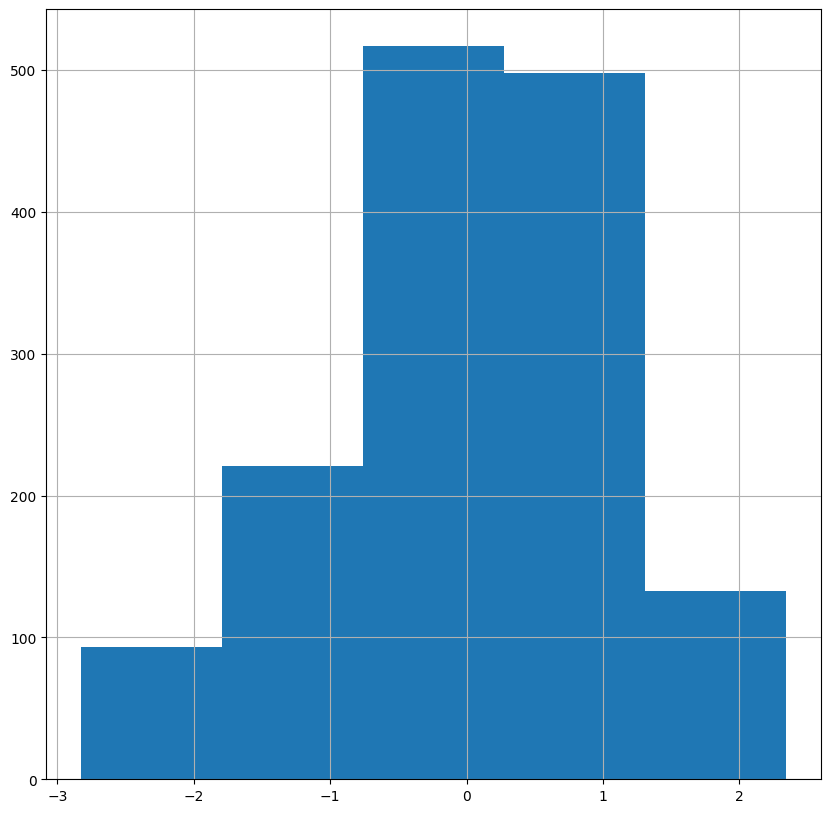

In [141]:
b.hist(figsize=(10,10),bins =5)
plt.show()

In [142]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.2,random_state=42)

In [143]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(a_train.drop('date', axis=1),b_train)

RandomForestRegressor(random_state=42)

In [144]:
b_pred = model.predict(a_test.drop('date', axis=1))

In [145]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [146]:
mean = mean_squared_error(b_test,b_pred)
accuracy  = r2_score(b_test,b_pred)
print( "accuracy of model :",accuracy*100)
print("mean square error :",mean)

accuracy of model : 62.38577658888078
mean square error : 0.35064464824388475


### Feature Engineering: Extracting Temporal Features from 'date'

In [147]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day,day_of_week
0,2013-01-01,-2.109500,1.415439,0.000000,1015.666667,2013,1,1,1
1,2013-01-02,-2.463454,1.862828,2.980000,1017.800000,2013,1,2,2
2,2013-01-03,-2.495219,1.564569,4.633333,1018.666667,2013,1,3,3
3,2013-01-04,-2.291015,0.630022,1.233333,1017.166667,2013,1,4,4
4,2013-01-05,-2.654044,1.554627,3.700000,1016.500000,2013,1,5,5


Now that we have new features, let's redefine our `a` and `b` (features and target for humidity) and retrain the model.

In [148]:

a = df.drop(['humidity', 'date'], axis = 1)
b = df['humidity']

print("Features (a) with new columns:")
display(a.head())
print("Target (b):")
display(b.head())

Features (a) with new columns:


,meantemp,wind_speed,meanpressure,year,month,day,day_of_week
0,-2.109500,0.000000,1015.666667,2013,1,1,1
1,-2.463454,2.980000,1017.800000,2013,1,2,2
2,-2.495219,4.633333,1018.666667,2013,1,3,3
3,-2.291015,1.233333,1017.166667,2013,1,4,4
4,-2.654044,3.700000,1016.500000,2013,1,5,5


Target (b):


,humidity
0,1.415439
1,1.862828
2,1.564569
3,0.630022
4,1.554627


In [149]:

from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [150]:

from sklearn.ensemble import RandomForestRegressor

model_humidity_enhanced = RandomForestRegressor(random_state=42)
model_humidity_enhanced.fit(a_train, b_train)

RandomForestRegressor(random_state=42)

In [151]:

b_pred_enhanced = model_humidity_enhanced.predict(a_test)

### Evaluate the enhanced model performance

In [152]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_enhanced = mean_squared_error(b_test, b_pred_enhanced)
accuracy_enhanced = r2_score(b_test, b_pred_enhanced)

print( "Accuracy of enhanced model :", accuracy_enhanced * 100)
print("Mean square error of enhanced model :", mean_enhanced)

Accuracy of enhanced model : 80.92222934956975
Mean square error of enhanced model : 0.1778454417596756


In [153]:
b_pred

array([-1.58233477,  0.16204145,  0.71790787, -2.03346511,  0.42866727,
        0.35582831,  1.1826652 ,  0.10753939,  0.75921671, -1.378784  ,
       -0.29556969, -1.96497597,  0.54315289,  0.26716652,  0.78284787,
        0.88836894,  1.28169071,  0.88814853,  0.58879803, -0.31535003,
        0.28001994, -0.66647549, -0.04291931,  0.71098395,  0.87846317,
       -1.029874  ,  0.9234173 ,  0.79426909,  0.07082741,  1.43505361,
        0.20198268, -1.3986069 , -0.18335437, -0.13106839,  0.04147935,
        0.26173615,  0.15652754,  1.10899126,  0.11569128,  0.70682961,
       -0.1559341 , -1.47887127,  0.50971934,  1.06299434,  0.66404141,
        0.61019273, -1.39589965,  1.0326815 , -0.21930514, -1.48719474,
       -1.71873988,  0.02893069, -0.69571412, -0.14526204, -0.29284926,
       -1.93211587, -0.88573401, -0.40359149,  1.11883632, -1.7657049 ,
        1.07889899,  0.27153849, -0.11776715,  1.39583834, -0.97054704,
        0.44461644,  0.9143747 ,  0.7677392 ,  0.93954072, -0.70

Now, let us predict the mean_pressure

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scalar = StandardScaler()
list2 =["meanpressure"]
df[list2] = scalar.fit_transform(df[list2])
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day,day_of_week
0,2013-01-01,-2.109500,1.415439,0.000000,0.025321,2013,1,1,1
1,2013-01-02,-2.463454,1.862828,2.980000,0.037162,2013,1,2,2
2,2013-01-03,-2.495219,1.564569,4.633333,0.041972,2013,1,3,3
3,2013-01-04,-2.291015,0.630022,1.233333,0.033647,2013,1,4,4
4,2013-01-05,-2.654044,1.554627,3.700000,0.029946,2013,1,5,5


In [159]:
c = df.drop('meanpressure',axis = 1)
d = df['meanpressure']

In [160]:
c.head(10)

,date,meantemp,humidity,wind_speed,year,month,day,day_of_week
0,2013-01-01,-2.109500,1.415439,0.000000,2013,1,1,1
1,2013-01-02,-2.463454,1.862828,2.980000,2013,1,2,2
2,2013-01-03,-2.495219,1.564569,4.633333,2013,1,3,3
3,2013-01-04,-2.291015,0.630022,1.233333,2013,1,4,4
4,2013-01-05,-2.654044,1.554627,3.700000,2013,1,5,5
5,2013-01-06,-2.517908,1.314031,1.480000,2013,1,6,6
6,2013-01-07,-2.517908,1.063492,6.300000,2013,1,7,0
7,2013-01-08,-2.265084,0.175531,7.142857,2013,1,8,1
8,2013-01-09,-1.564956,-0.567988,12.500000,2013,1,9,2
9,2013-01-10,-1.973364,0.073270,7.400000,2013,1,10,3


In [161]:
d.head()

,meanpressure
0,0.025321
1,0.037162
2,0.041972
3,0.033647
4,0.029946


Now, let us predict the mean_pressure

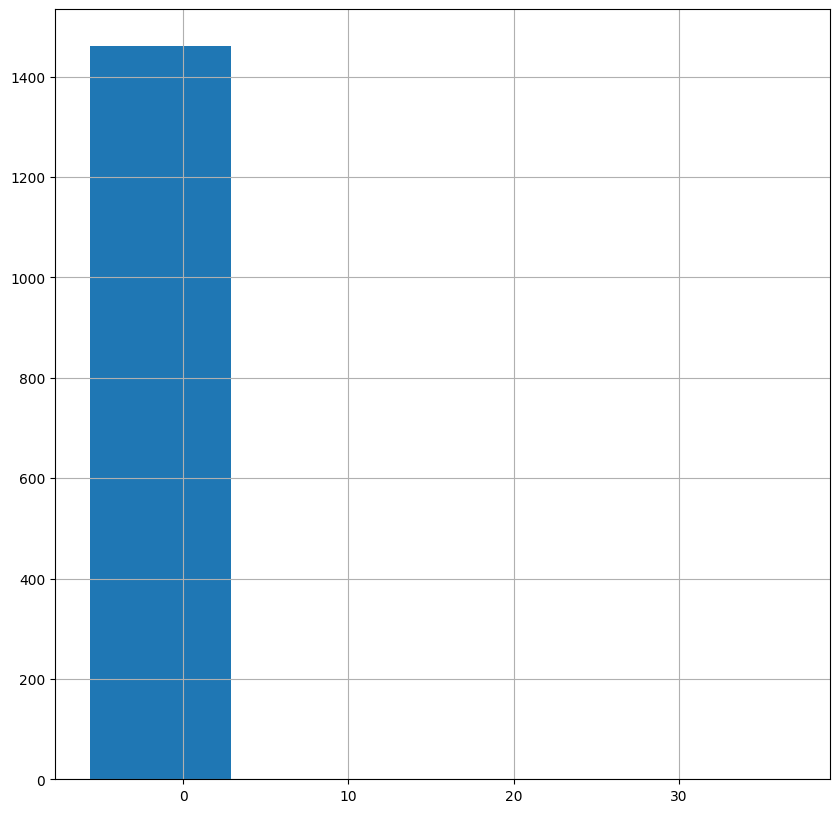

In [164]:

import matplotlib.pyplot as plt
d.hist(figsize=(10,10),bins =5)
plt.show()

In [172]:
from sklearn.model_selection import train_test_split

c_train,c_test,d_train,d_test = train_test_split(c.drop('date', axis=1),d,test_size=0.2,random_state=42)

In [173]:
from sklearn.ensemble import RandomForestRegressor

model_meanpressure = RandomForestRegressor(random_state=42)
model_meanpressure.fit(c_train,d_train)

RandomForestRegressor(random_state=42)

In [174]:

d_pred = model_meanpressure.predict(c_test)

### Evaluate the meanpressure prediction model performance

In [176]:
from sklearn.metrics import mean_squared_error, r2_score


meanpressure_mse = mean_squared_error(d_test,d_pred)
meanpressure_r2 = r2_score(d_test,d_pred)

print( "Accuracy of meanpressure model :", -1* 10*meanpressure_r2)
print("Mean square error of meanpressure model :", meanpressure_mse)

Accuracy of meanpressure model : 96.31925330021608
Mean square error of meanpressure model : 0.31225391545146036
